# SMU MSDS 6372 Advance Statistical Modeling - Project 1 

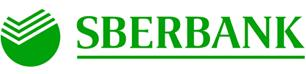

## Goal 1: Prediction of Individual Property Values

> __ABSTRACT__ 
The housing market in Russia is relatively stable, and contrary to mainstream knowledge on real estate, the value of a property is determined my more factors than the typical square area, number of floors/bathrooms and bedrooms. This report extends this belief to other factors using up to the available 291 explanatory variables to develop a set of advanced regression models that would best predict the price of an individual property in the Russia area. In collaboration with SBERBANK, enable buyers and sellers to make the most effective decisions during real estate business decisions. 

### Objective
Utilizing the provided `modleingData` _(train)_ and `projectionData` _(test)_, provide 3 candidate models that best predicts the individual property values `price_doc` _(response/target variable)_. One of the core metrics used to determine the best model is the model that minimized the __Root Mean Squared Logarithmic Error__ (RMSLE)


### Contents
This notebook primarly focuses on the data analysis and feature selection in preparation for statistical modeling:
1. Data Collection
2. Preprocessing and Data Cleaning
3. Exploratory Analysis _(correlation, VIF)_

----
### LASSO Model .... first try
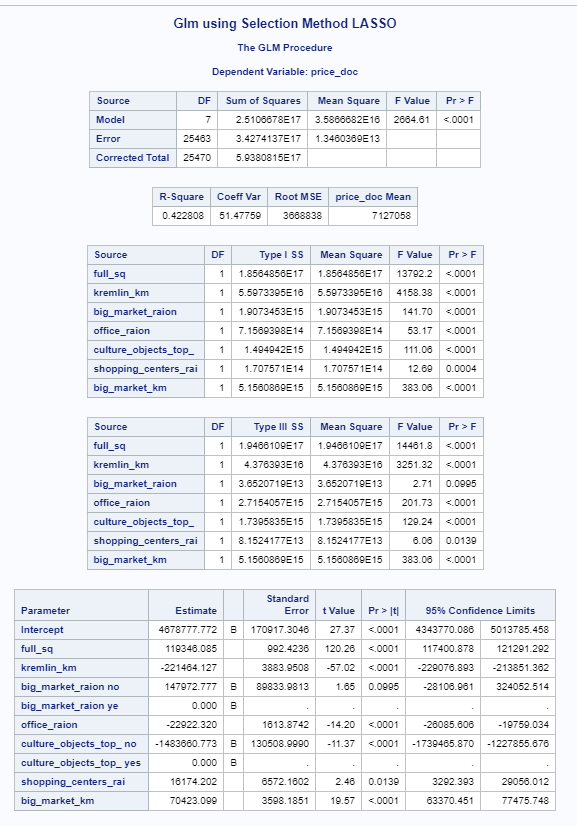


```sas
ods graphics on;
title "Glm using Selection Method LASSO";
proc glm data = dat plots=all;
	class big_market_raion culture_objects_top_25;
	model price_doc = full_sq kremlin_km big_market_raion office_raion culture_objects_top_25 shopping_centers_raion big_market_km/ tolerance solution clparm  ;
	output out = LASSO_output p=predict PRESS=CSVPress;
	
run;quit;ods graphics off;
```

In [190]:
!dir data

 Volume in drive C is OSDisk
 Volume Serial Number is DC78-EAF9

 Directory of C:\Users\phhale\OneDrive - Southern Methodist University\MSDS 6372 Applied Statistics\Project 1\data

06/01/2019  09:03 AM    <DIR>          .
06/01/2019  09:03 AM    <DIR>          ..
06/01/2019  09:03 AM    <DIR>          .ipynb_checkpoints
06/01/2019  09:03 AM                 0 sample_submission_.csv
               1 File(s)              0 bytes
               3 Dir(s)  24,678,633,472 bytes free


In [191]:
%%html
<div id="data"><p><iframe src="./data_dictionary.txt" frameborder="2" height="300"width="97%"></iframe></p></div>

__Import Libraries and required data sets__

In [192]:
import pandas as pd
import numpy as np

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import plotting libraries
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# style
%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200, 'display.float_format', lambda x: '%.3f' % x)
sns.set(style='white', context='notebook', palette='deep')

We use `pandas` to read the `modelingData.csv` (train data) and the `projectionData.csv` (test data). We will first use the `train` dataset for analysis and modeling and then use `test` to make predictions. 

In [193]:
train = pd.read_csv("./modelingData.csv")
test = pd.read_csv("./projectionData.csv")
train['flag'] = 'train'
test['flag'] = 'test'
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,...,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,flag
0,1,8/20/2011,43,27.000,4.000,nan,nan,nan,nan,nan,nan,Investment,Bibirevo,6407578.100,155572,0.190,0.000,9576,5001.000,5,10309,11065.000,5,0,240.000,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,8083,18654,9709,8945,211.000,25.000,

In [194]:
print("Train data: ")
print("Training data Observations (rows): ", train.shape[0])
print("Training data Factors (columns): ", train.shape[1])
print("----------------------------------------------------")
print("Test data: ")
print("Test data Observations (rows): ", test.shape[0])
print("Test data Factors (columns): ", test.shape[1])

Train data: 
Training data Observations (rows):  25471
Training data Factors (columns):  293
----------------------------------------------------
Test data: 
Test data Observations (rows):  5000
Test data Factors (columns):  292


We can see from the above output that the `train` dataset has one additional column than the `test` dataset, which is appropriately due to the fact the `train` dataset has `price_doc` which is the final property price that it is our objective to predict. 

### Preliminary Summary Statistics and Data Analysis
In regards to the training below are some summary statistics

In [247]:
print("SBERBANK Preliminary Summary Statistics (training dataset)")
print("Number of properties: ", len(train))
print("Mean Property Price: ", str("$"), round(train.price_doc.mean(),0))
print("Highest Property Price: ", str("$"),train.price_doc.max())
print("Lowest Property Price: ", str("$"),train.price_doc.min())
print("Variability Property Price (standard dev): ", str("$"),round(train.price_doc.std(),0))

highest_area = train.groupby(['sub_area']).price_doc.mean().nlargest(1)
smallest_area = train.groupby(['sub_area']).price_doc.mean().nsmallest(1)
print(" ")
print("On Average, %s is the HIGHEST Property Sub Area with $ %d " % (highest_area.index[0], highest_area.values[0]))
print("On Average, %s is the LOWEST Property Sub Area with $ %d " % (smallest_area.index[0], smallest_area.values[0]))

SBERBANK Preliminary Summary Statistics (training dataset)
Number of properties:  25471
Mean Property Price:  $ 7127058.0
Highest Property Price:  $ 111111112
Lowest Property Price:  $ 190000
Variability Property Price (standard dev):  $ 4828460.0
 
On Average, Hamovniki is the HIGHEST Property Sub Area with $ 21025307 
On Average, Poselenie Klenovskoe is the LOWEST Property Sub Area with $ 1000000 


### Review of Normality 
Next we plot 2 histograms for `price_doc` to get a better understanding of the current distribution. The historgram on the left is of `price_doc` and on the right is `price_doc` with a log transformation. 

Skewness of the 'price_doc':       4.687
Skewness of the 'log(price_doc)':  -0.667


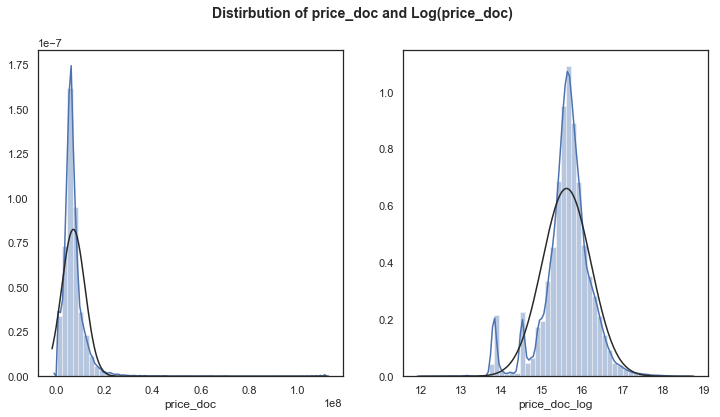

In [196]:
fig, ax =plt.subplots(1,2,figsize=[12,6])
plt.suptitle('Distirbution of price_doc and Log(price_doc)', fontsize=14, fontweight='bold')

sns.distplot(train.price_doc, fit=norm, ax=ax[0], )

#sns.distplot(np.log(train.price_doc), fit=norm, ax=ax[1])
train['price_doc_log'] = np.log(train.price_doc)
sns.distplot(train.price_doc_log, fit=norm, ax=ax[1])
fig.show()

#check on the skew and kurtosis
print("Skewness of the 'price_doc':      ", round(train.price_doc.skew(), 3))
#print("Kurtosis: ", round(train.price_doc.kurt(), 3))
print("Skewness of the 'log(price_doc)': ", round(np.log(train.price_doc).skew(), 3))

The left plot when `price_doc` is subject to no transformation we see a __long tail right distribution__. This is also supported by the `skewness` statistic of 4.687 which is > 0 indicatng a __highly positive skewness__.  

Train has one column more than test because of the __target value: `price_doc`__ we will combin in cleaning and then separate back out for model selection. 

#### Kolmogorov-Smirnov Test

To suppliment the analysis of normality, we can use the __Kolmogorov-Smirnov Test__ to calculate whether the `price_doc` comes from a _normal distirbution_. The Kolmogorov-Smirnov test is best used for large sample size, in which our hypothesis test is as follows:
* $H_0 =$ p-value > 0.05
* $H_A =$ p-alue < 0.05 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html

In [197]:
def interpret(p_value, alpha_level=0.05):
    if p_value > alpha_level:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

# normality test using the Shapiro Test
stat, p = stats.kstest(train.price_doc,'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))

interpret(p)

Statistics=1.000, p=0.000
Different distribution (reject H0)


```sas
** NORMALITY TEST;
title "Test for Normality for train dataset";   
proc univariate data = train normal;
var price_doc;
run;
```
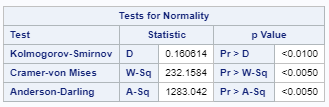

We can interpret the following p-value that we reject the $H_0$, given p-value is less than 0.05 our significance level, concluding `price_doc` is not a normal distribution and we can look to perform other transformations. Hense supporting our inital assumption of a log transformation. 

#### QQ Plot Normality Check

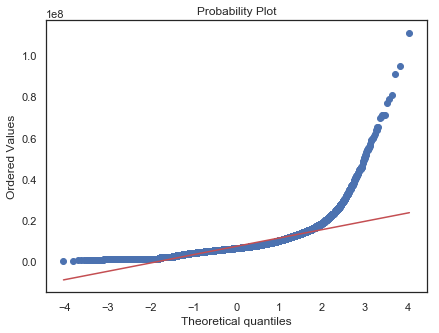

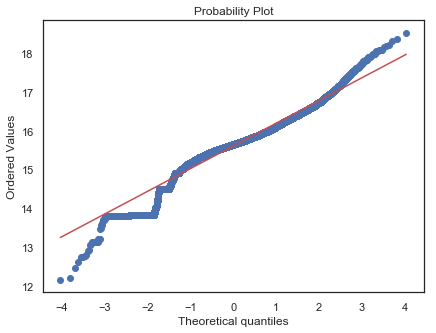

In [202]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('QQ plot price_doc')
stats.probplot(train.price_doc, plot=plt, dist="norm")
plt.show()

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.title('QQ plot log price_doc')
#stats.probplot(np.log(train.price_doc), plot=plt, dist="norm")
stats.probplot(train.price_doc_log, plot=plt, dist="norm")
plt.show()

Normality review also shows a strong positive skew in `price_doc` that could be a canidate for transformation. 

---
## Cleaning
Combine both train and test data set for data cleaning. 

In [203]:
#df = pd.concat([train[train.columns[:-1]], test])

## combine into one df for cleaning
df = pd.concat((train.loc[:, ~train.columns.isin(['price_doc', 'price_doc_log'])], test), axis = 0, ignore_index=True)
df['price_doc'] = train.price_doc
#df = pd.read_csv("./allData.csv")
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,...,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,flag,price_doc
0,1,8/20/2011,43,27.000,4.000,nan,nan,nan,nan,nan,nan,Investment,Bibirevo,6407578.100,155572,0.190,0.000,9576,5001.000,5,10309,11065.000,5,0,240.000,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,8083,18654,9709,8945,211.000,25.000,

In [204]:
print("Combined data: ")
print("Combined data Observations (rows): ", df.shape[0])
print("Combined data Factors (columns): ", df.shape[1])

Combined data: 
Combined data Observations (rows):  30471
Combined data Factors (columns):  293


__Rename long column names for SAS__

In [205]:
# rename list
rename_col_sas = {
    'preschool_education_centers_raion':'prek_raison',
    'school_education_centers_top_20_raion': 'school_top20_raison',
    'raion_build_count_with_builddate_info': 'raison_build_count_info',
    'public_transport_station_min_walk':'public_transport_minwalk',
    
    '0_6_all':'under6_all',
    '0_6_male':'under6_m',
    '0_6_female':'under6_f',
    '7_14_all':'seven_14_all',
    '7_14_male':'seven_14_m',
    '7_14_female':'seven_14_f',
    '0_17_all':'under17_all',
    '0_17_male':"under17m",
    '0_17_female':'under17f',
    '16_29_all':'sixteen_29_all',
    '16_29_male':'sixteen_29m',
    '16_29_female':'six_29f',
    '0_13_all':'under13_all',
    '0_13_male':'under13_m',
    '0_13_female':"under13_f"
    
}

df.rename(columns=rename_col_sas, inplace=True)

In [206]:
df.sub_area.unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", 'Mitino',
       'Basmannoe', 'Nizhegorodskoe', "Sokol'niki", 'Koptevo', 'Kuncevo',
       'Kosino-Uhtomskoe', 'Zapadnoe Degunino', 'Presnenskoe',
       'Lefortovo', "Mar'ino", "Kuz'minki", 'Nagornoe', "Gol'janovo",
       'Vnukovo', 'Juzhnoe Tushino', 'Severnoe Tushino',
       "Chertanovo Central'noe", 'Otradnoe', 'Novo-Peredelkino',
       'Bogorodskoe', 'Strogino', 'Hovrino', "Moskvorech'e-Saburovo",
       'Ljublino', 'Caricyno', 'Veshnjaki', 'Danilovskoe',
       'Preobrazhenskoe', "Kon'kovo", 'Brateevo', 'Vostochnoe Izmajlovo',
       'Jaroslavskoe', 'Vyhino-Zhulebino', 'Donskoe', 'Novogireevo',
       'Juzhnoe Butovo', 'Sokol', 'Kurkino', 'Izmajlovo',
       'Severnoe Medvedkovo', 'Rostokino', 'Orehovo-Borisovo Severnoe',
       'Taganskoe', 'Dmitrovskoe', 'Orehovo-Borisovo Juzhnoe',
       'Teplyj Stan', 'Babushkinskoe', 'Staroe Krjukovo',
       'Pokrovskoe Streshnevo', 'Obruchevskoe', 'Filevskij Park',
       'Tropar

In [207]:
def category_view(variable):
    fig = plt.figure()   
    fig = sns.countplot(variable);
    print(variable.describe())
    print(variable.unique())
    print("number of categories: ", len(variable.unique()))

count          30471
unique             2
top       Investment
freq           19448
Name: product_type, dtype: object
['Investment' 'OwnerOccupier']
number of categories:  2


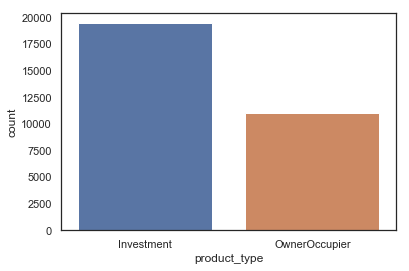

In [208]:
category_view(df.product_type);

For `product type` there appears to only be 2 unique values `Investment` and `OwnerOccupier`. This is a great candidate for one-hot encoding transformation wheere we turn this data into a boolean (0/1) dummy variable column. To do this we will utilize `pandas` `get_dummies()` function. 

__State Variable__

There appears to be an outlier with `state` at 33. we can infer that is is a miss key for `3`

count   16912.000
mean        2.107
std         0.880
min         1.000
25%         1.000
50%         2.000
75%         3.000
max        33.000
Name: state, dtype: float64
[nan  3.  1.  2.  4. 33.]
number of categories:  6


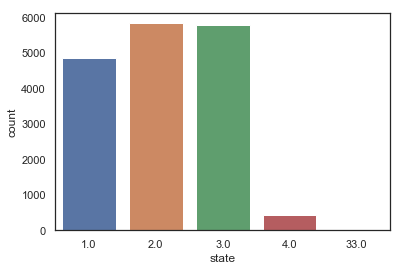

In [209]:
category_view(df.state);

In [210]:
train.loc[train.state == 33.0, 'state'] = 3
df.loc[df.state == 33.0, 'state'] = 3

In [211]:
state_piv = train.pivot_table(values = 'price_doc', index = 'state', 
                               aggfunc = np.median)
state_piv

,price_doc
state,
1.000,6183691
2.000,6650000
3.000,7300000
4.000,9925000


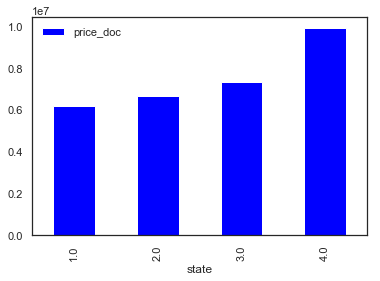

In [145]:
state_piv.plot(kind='bar', color='blue')


We can see that `median price` increases as the `state` increases. 

## Data Quality Checks & Null Values
we have a lot of column names, with im sure plenty of missing or incorrectly formatted values. 


In [146]:
fake = pd.DataFrame(df.isnull().sum())
fake[fake[0].values > 0]

,0
life_sq,6383
floor,167
max_floor,9572
material,9572
build_year,13605
num_room,9572
kitch_sq,9572
state,13559
preschool_quota,6688
school_quota,6685


### Data/Time Formats
reformated initial datetime in excel before starting this notebook.

In [524]:
from datetime import datetime as dt
df['timestamp'] = pd.to_datetime(df.timestamp)

df['day'] = df.timestamp.dt.day
df['month'] = df.timestamp.dt.month
df['year'] = df.timestamp.dt.year


In [502]:
#https://stackoverflow.com/questions/51095085/how-to-merge-month-and-year-columns-to-get-single-mm-yyyy-column
df['MonthYear'] = pd.to_datetime(df.assign(Day=1)[['year','month','day']].rename(columns=str.lower)).dt.strftime('%Y%m')

In [520]:
type(df.month[0])

numpy.int64

In [536]:
from datetime import datetime as dt
ts = train.copy()
ts['timestamp'] = pd.to_datetime(ts.timestamp)

ts['day'] = ts.timestamp.dt.day
ts['month'] = ts.timestamp.dt.month
ts['year'] = ts.timestamp.dt.year
ts['MonthYear'] = pd.to_datetime(ts.assign(Day=1)[['year','month','day']].rename(columns=str.lower)).dt.strftime('%Y%m')

In [565]:
#ts = df[['id', 'month', 'year', 'MonthYear', 'price_doc']]
#ts['month'] = ts['month'].astype('category')
ts_ = ts.groupby(['year','MonthYear'])['price_doc'].mean().reset_index()
ts_['months_'] = ts_.index + 1
ts_.head(10)


,year,MonthYear,price_doc,months_
0,2011,201108,5850000.000,1
1,2011,201109,6255310.057,2
2,2011,201110,5667466.103,3
3,2011,201111,6140269.116,4
4,2011,201112,5812806.357,5
5,2012,201201,6967014.896,6
6,2012,201202,6815771.139,7
7,2012,201203,6789860.019,8
8,2012,201204,6720821.319,9
9,2012,201205,7393948.929,10


__Plot the time series of the price_doc versus the numbers 1 – 47 on the x-axis.  You should simply name the x-axis “months”.__

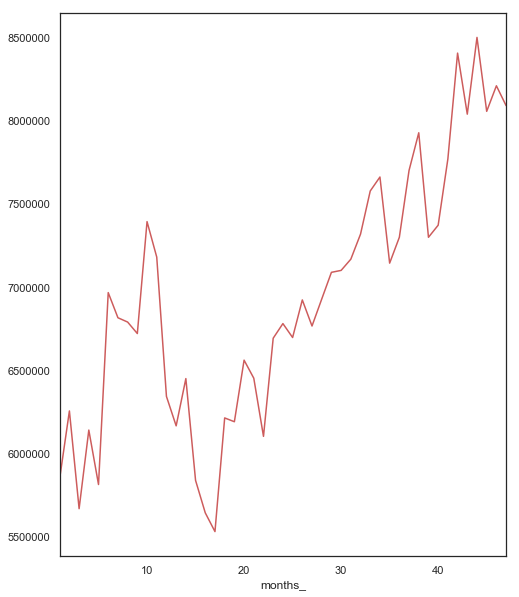

In [560]:
sns.tsplot(ts_.price_doc, time = ts_.months_, color="indianred");

__Lag-1 Price__
below is a created column of `price_lag1` variable to consider a scatterplot of price vs lag1 variable. 

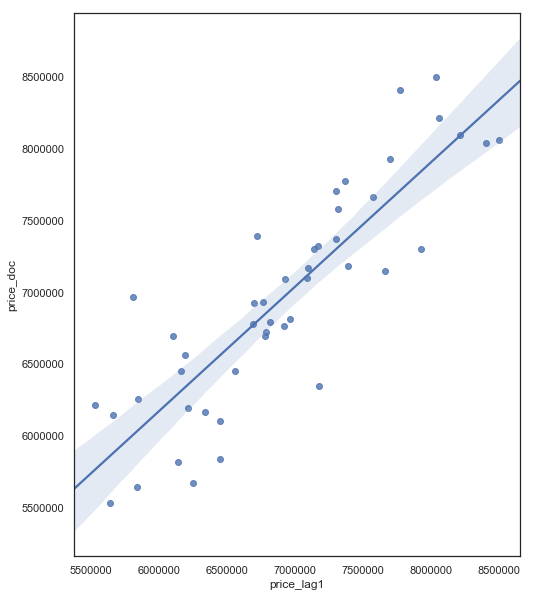

In [572]:
ts_['price_lag1'] = ts_.price_doc.shift(1)
sns.regplot(x = ts_.price_lag1, y=ts_.price_doc)

ts_.to_csv("./data/goal2_data.csv")

Notice the non-random trend suggesting autocorrelated errors in the scatter plot

__OLS__

In [569]:
ts_model = smf.ols(formula='price_doc~ months_', data = ts_).fit()
print(ts_model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_doc   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     85.75
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           5.46e-12
Time:                        16:22:37   Log-Likelihood:                -678.67
No. Observations:                  47   AIC:                             1361.
Df Residuals:                      45   BIC:                             1365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.825e+06   1.37e+05     42.560      0.0

Below is 

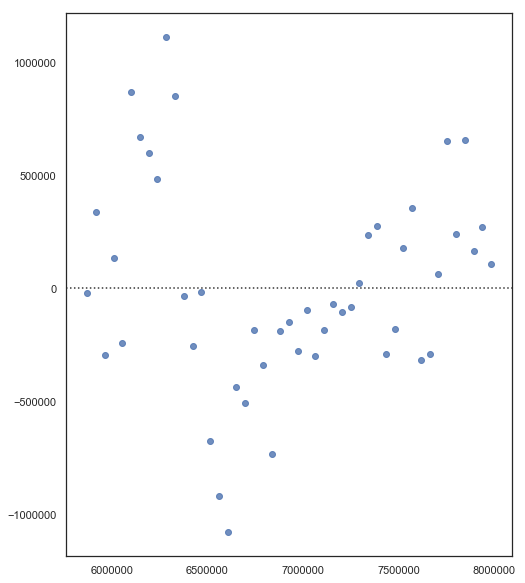

In [571]:
sns.residplot(x = ts_model.fittedvalues, y = ts_model.resid);

In [483]:
df.MonthYear.describe()

count       30471
unique         47
top       2014-12
freq         1705
Name: MonthYear, dtype: object

Property transaction between 2011 and 2015 that we are assessing.

In [450]:
df.loc[['month', 'year'], 'monthYear'] = int(str(df.month)  + str(df.year))

ValueError: invalid literal for int() with base 10: '0        8\n1        8\n2        8\n3        9\n4        9\n5        9\n6        9\n7        9\n8        9\n9        9\n10       9\n11       9\n12       9\n13       9\n14       9\n15       9\n16     

In [470]:
years_ = df.year
months_ = df.month

In [471]:
int(years_)

TypeError: cannot convert the series to <class 'int'>

In [476]:
months_.

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [480]:
int(str(months_)+ str(1))

ValueError: invalid literal for int() with base 10: '0        8\n1        8\n2        8\n3        9\n4        9\n5        9\n6        9\n7        9\n8        9\n9        9\n10       9\n11       9\n12       9\n13       9\n14       9\n15       9\n16     

In [445]:
df.timestamp.dt.year.describe()

count   30471.000
mean     2013.453
std         0.962
min      2011.000
25%      2013.000
50%      2014.000
75%      2014.000
max      2015.000
Name: timestamp, dtype: float64

### Apartment Size Analysis

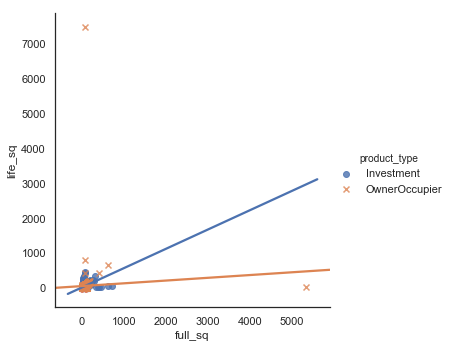

In [217]:
sns.lmplot(x ='full_sq', y = 'life_sq', data = df, hue = 'product_type', 
           ci = None, markers=["o", "x"])

There appears to be several outliers with `full_sq` and `life_sq`

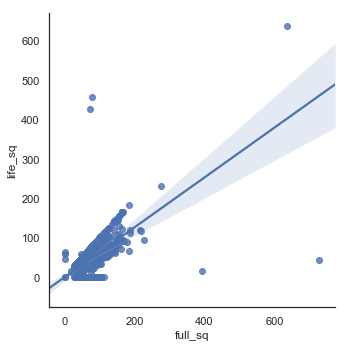

In [218]:
sns.lmplot(x ='full_sq', y = 'life_sq', data = df[(df.floor > 10) & (df.full_sq < 5000)])

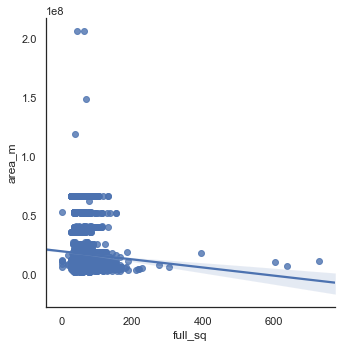

In [219]:
sns.lmplot(x ='full_sq', y = 'area_m', data = df[(df.floor > 10) & (df.full_sq < 5000)])

#### Apartment Size Anlaysis Final Outcomes
* Change `id: 3530` `full_sq: 5326` appears an outlier but really an input error, we believe this apt appars to be on the same floor as `id: 4184` given all the similar neighbourhood features. Therefore, `id: 3530` will be updated to `full_sq: 52`
* Remove `id: 13549` as the `life_sq: 7478` is an outlier, but after futher anysis appeared to be missed keyed. We changed this to a `NaN` value which was then made to be a canidate for median imputation

In [220]:
# updated features
df.loc[df.id==3530, "full_sq"] = 52
df.loc[df.id==13549, "life_sq"] = np.nan

##### Mediuam Imputation 
Create function to fill in missing values by grouping similar groups and taking the mediaum of the targeted column. 

In [221]:
def median_impute(data):
    return data.fillna(data.median())

In [222]:
# compute the nearest 10s for full_sq for life_sq imputations for NAs
df['full_sq10'] = (df.full_sq // 10) * 10

In [223]:
# group by sub area and the nears10s full sq
by_area_sq = df.groupby(['sub_area', 'full_sq10'])
by_area = df.groupby(['sub_area'])
by_sq = df.groupby(['full_sq10'])
df.life_sq = by_area_sq.life_sq.transform(median_impute)
df.life_sq = by_area.life_sq.transform(median_impute)
df.life_sq = by_sq.life_sq.transform(median_impute)

In [224]:
df.life_sq.isnull().sum()

0

__Median imputation on metro and railroad NA__

In [225]:
# imputation on mean for metro walk and km
df[df.metro_km_walk.isnull()].sub_area.unique()
df[df.metro_km_walk.isnull()].ID_metro.unique()

array([105, 158, 140,  21,  92,  88], dtype=int64)

In [226]:
by_area_metro = df.groupby(['sub_area', 'ID_metro'])
df.metro_km_walk = by_area_metro.metro_km_walk.transform(median_impute)
df.metro_min_walk = by_area_metro.metro_min_walk.transform(median_impute)
df.metro_km_walk.isnull().sum() + df.metro_min_walk.isnull().sum()

0

__STILL WORKING ON TRAIN NAs__

In [227]:
df[df.ID_railroad_station_walk.isnull()].sub_area.unique()

array(['Timirjazevskoe', 'Begovoe', 'Ochakovo-Matveevskoe',
       'Poselenie Vnukovskoe', 'Krylatskoe', 'Vojkovskoe'], dtype=object)

__Cafe Count - Median Impute__

In [228]:
# [col for col in df if col.startswith('cafe_')]
cafe_count_key = ['cafe_count_500','cafe_count_1000', 'cafe_count_1500', 
                  'cafe_count_2000', 'cafe_count_3000','cafe_count_5000']

for cafe_count_key_i in cafe_count_key:
    by_area = df.groupby(['sub_area', cafe_count_key_i])
    
    # list comprehension to create columns that are similar for median impute
    cols_= [col for col in df if col.startswith(cafe_count_key_i +"_")]
    
    for col_var in cols_:
        df[col_var] = by_area[col_var].transform(median_impute)
        

TBD SECTION Still have some cafe NULL items.. considering removing... not needed. 

In [229]:
cafe_avg_keys ={'cafe_avg_price_500': ['cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg'],
                'cafe_avg_price_1000': ['cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg'],
                'cafe_avg_price_1500':['cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg'],
                'cafe_avg_price_2000': ['cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg'],
                'cafe_avg_price_3000': ['cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg'],
                'cafe_avg_price_5000': ['cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg']}

Remaining features that have `NA` values... we will still include them in the correlation analysis in case we need to make some correection, but from the look of it, we will already have multicolinarity assessments to perform. 

In [230]:
fake = pd.DataFrame(df.isnull().sum())
print(fake[fake[0].values > 0])

                                          0
floor                                   167
max_floor                              9572
material                               9572
build_year                            13605
num_room                               9572
kitch_sq                               9572
state                                 13559
preschool_quota                        6688
school_quota                           6685
hospital_beds_raion                   14441
raion_build_count_with_material_info   4991
build_count_block                      4991
build_count_wood                       4991
build_count_frame                      4991
build_count_brick                      4991
build_count_monolith                   4991
build_count_panel                      4991
build_count_foam                       4991
build_count_slag                       4991
build_count_mix                        4991
raison_build_count_info                4991
build_count_before_1920         

#### VARIABLES EDA DECISONS

* Removing `floor`, `max_floor`, `materials`, `build_year`, `num_rooms`,`state` as there is not enough information for imputation. even with a multiple linear regression, for potential predictions, the results accuracy would need to at least by reviewed by someone from SBER Bank. 
* __`kitch_sq`__ dropped - inaccuracys such as - `ID: 8059` where `full_sq` and `life_sq` = 11 but `kitch_sq` = 12

In [231]:
df[df.id == 8059][['id', 'timestamp','full_sq', 'life_sq', 'kitch_sq']]

,id,timestamp,full_sq,life_sq,kitch_sq
6720,8059,2013-05-21,11,11.000,12.000


looking at the `sub_area` distribution, most of them come from the `Poselenie` neighborhood - these are great canadiated for developing new features. TBD

## EDA QUESTIONS:
1. Whats up with `metro_min_walk` `id: 21485`? `sub_area: Nagornoe` - outlier

---
# Feature Engineering

### Categorical Features

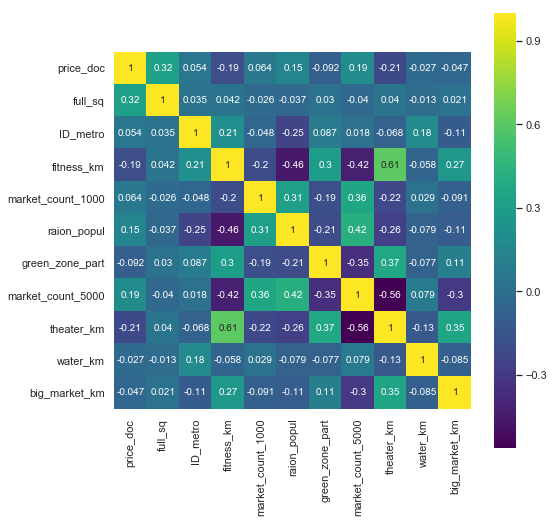

In [74]:
columns = ['price_doc','full_sq','ID_metro', 'fitness_km', 'market_count_1000', 'raion_popul', 'green_zone_part',
          'market_count_5000', 'theater_km', 'water_km', 'big_market_km']

corr_matrix = train[columns].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='viridis')

In [ ]:
columns = ['price_doc','full_sq','kremlin_km','culture_objects_top_25_raion', 'market_count_1000', 'shopping_centers_raion',
          'market_count_5000', 'theater_km', 'water_km','water_treatment_km' , 'big_market_km', 'nuclear_reactor_raion', 
          'detention_facility_raion', 'water_treatment_km', 'big_church_km', 'big_market_km', 'market_shop_km',
          'shopping_centers_raion', 'office_raion']

"""
'raion_popul'
'ID_metro'
"""

corr_matrix = train[columns].corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr_matrix, vmax=.8, square=True, annot=True, cmap='viridis')

### Correlation Analysis
* `life_sq` was correlated with `full_sq` and `full_sq` is more correlated with price. `fill_sq` kept.


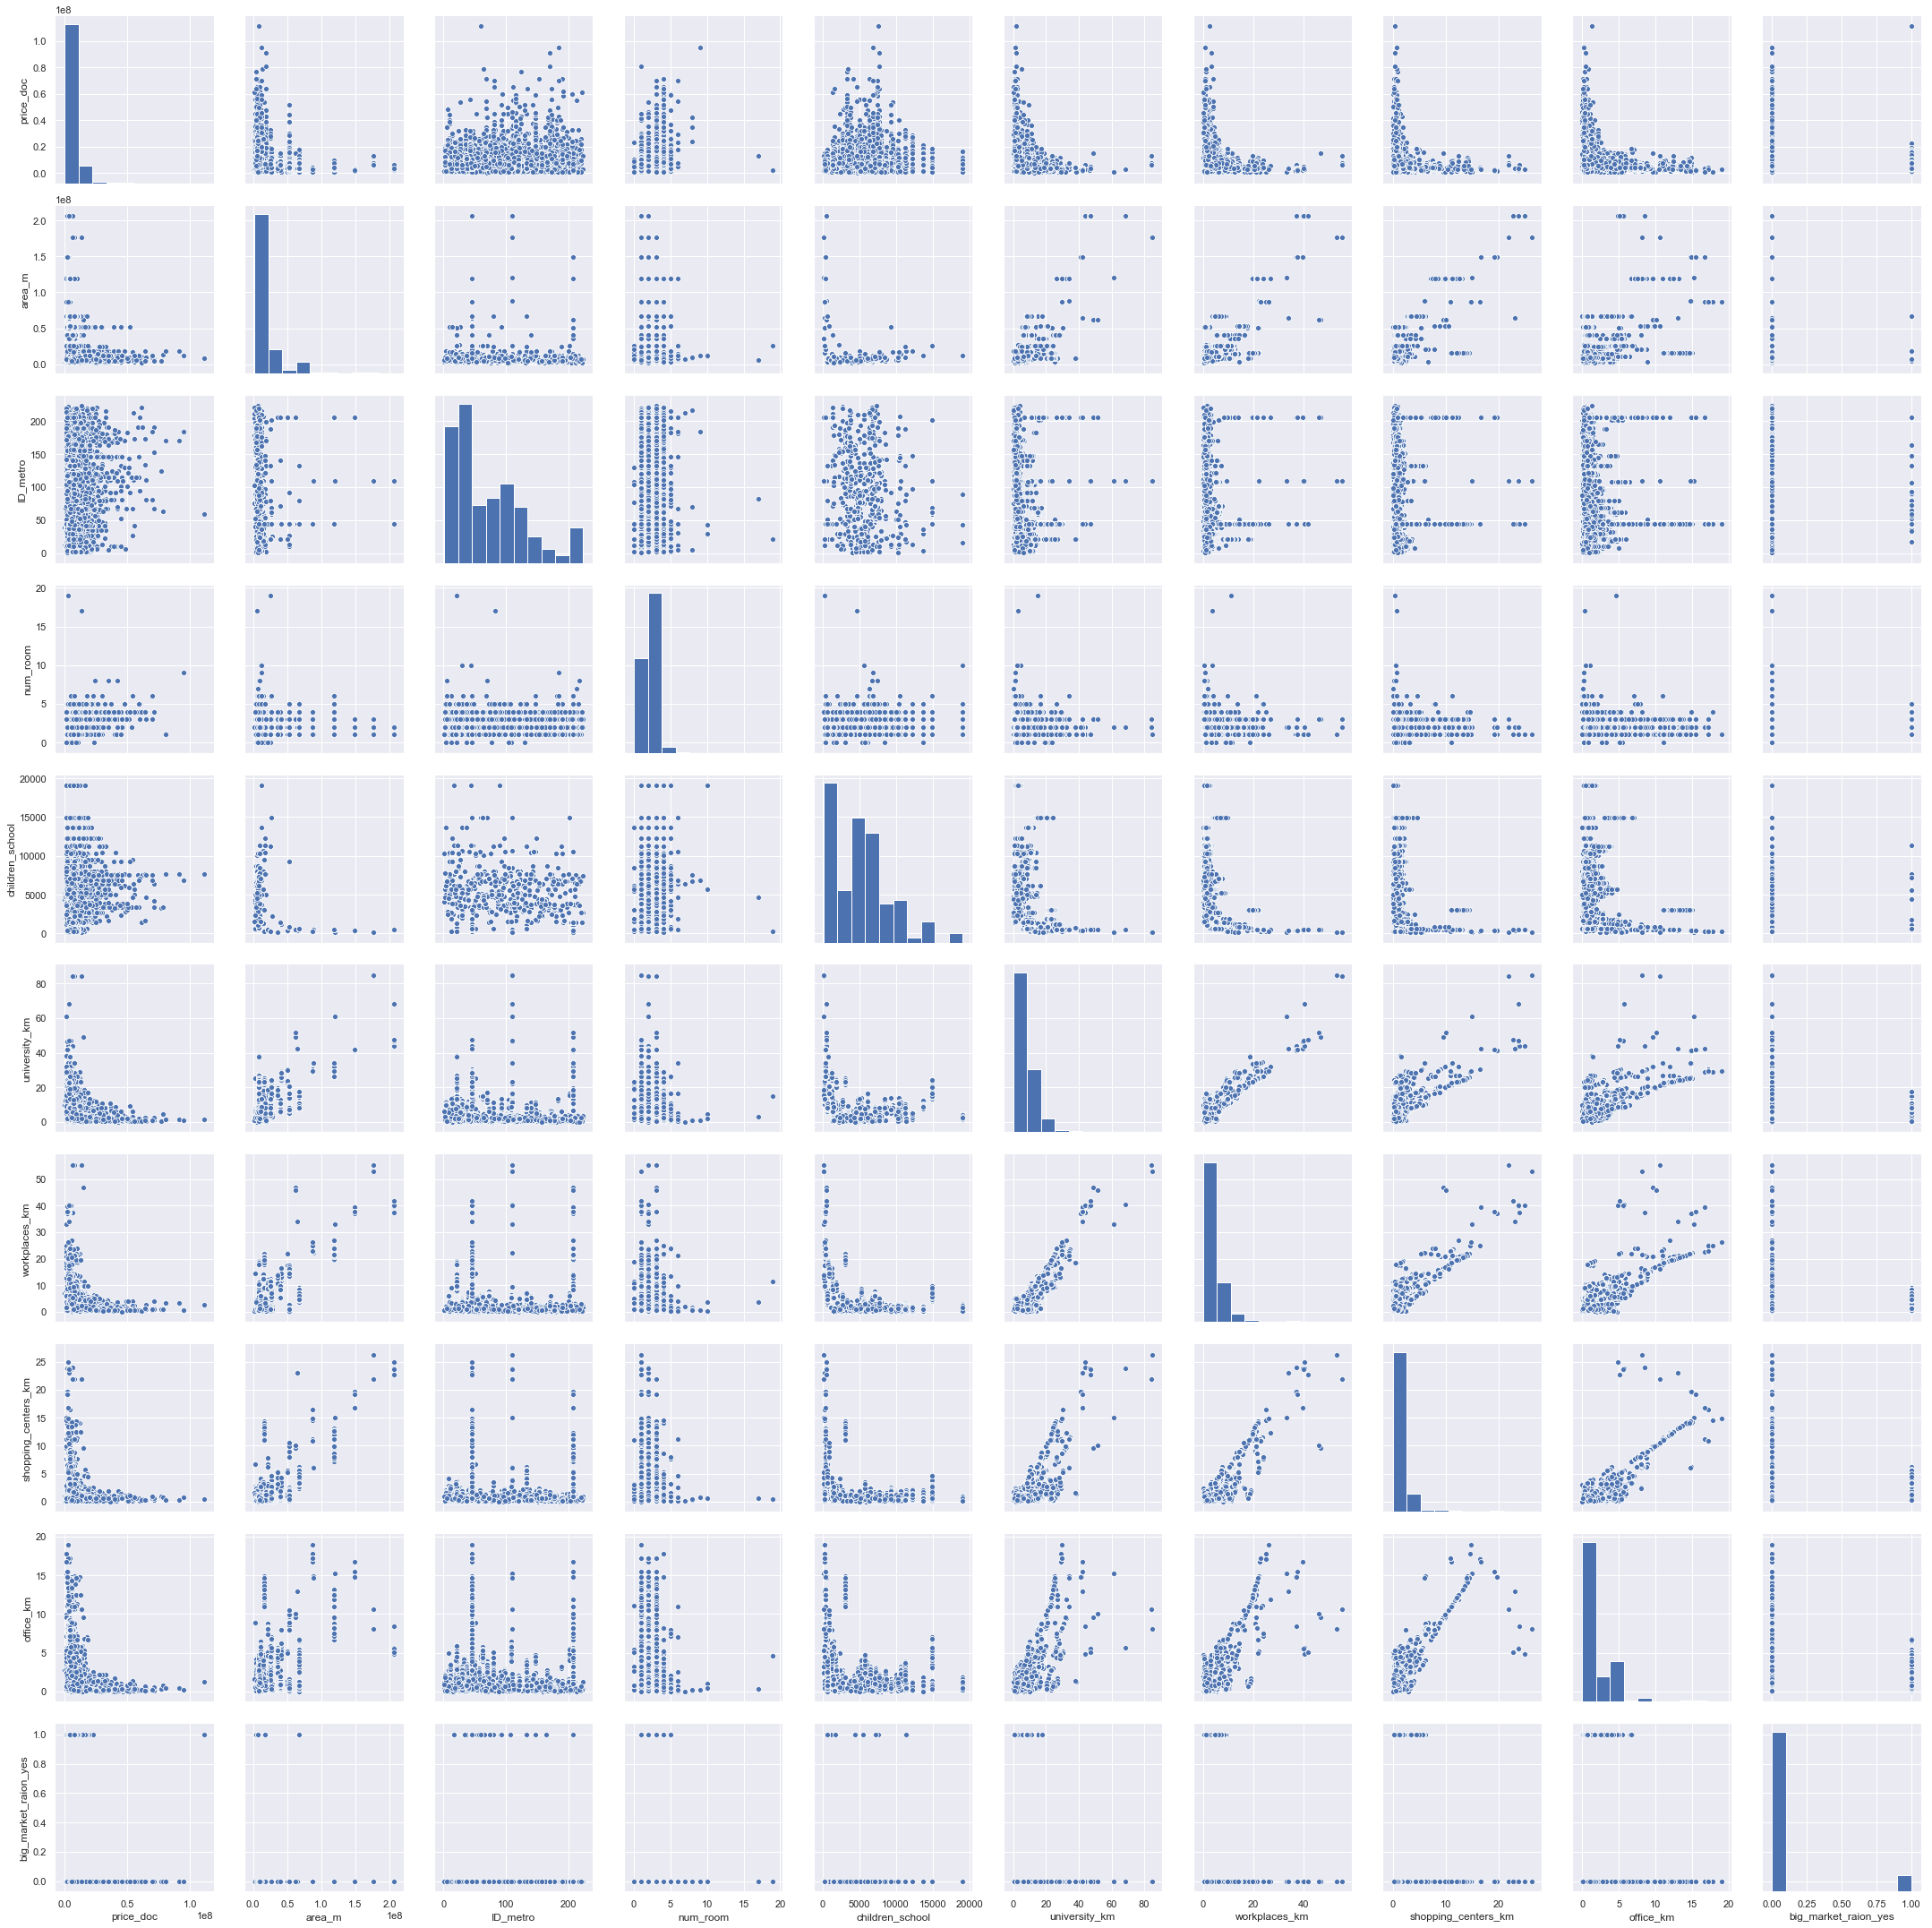

In [258]:
sns.set()
columns = ['price_doc','product_type', 'sub_area', 'area_m', 'ID_metro','num_room','children_school',
           'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km', 'big_market_raion_yes']

sns.pairplot(all_data[columns], size = 3, kind = 'scatter')
plt.show()

In [ ]:
sns.set()
columns = ['price_doc','product_type', 'sub_area', 'area_m', 'ID_metro','num_room','children_school',
           'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km', ]

sns.pairplot(all_data[columns], size = 3, kind = 'scatter')
plt.show()

## Perason's R Correlation Coefficient

Correlation coefficient ranges from -1 to 1. When the correlation coeffiecient is lose to absoluate -1 to 1, that means there is a strong correlation. 

In [339]:
train_correlation_target = abs(train_corr.price_doc)
corr_matrix = train_correlation_target[train_correlation_target>0.2]
potentialFeatures=list(corr_matrix[:-1].index)

In [182]:
# create a function for plotting a dataframe with string columns and numeric values

def plot_dataframe(df, y_label):
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20,12)
    plt.ylabel(y_label)
    
    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
    plt.show()

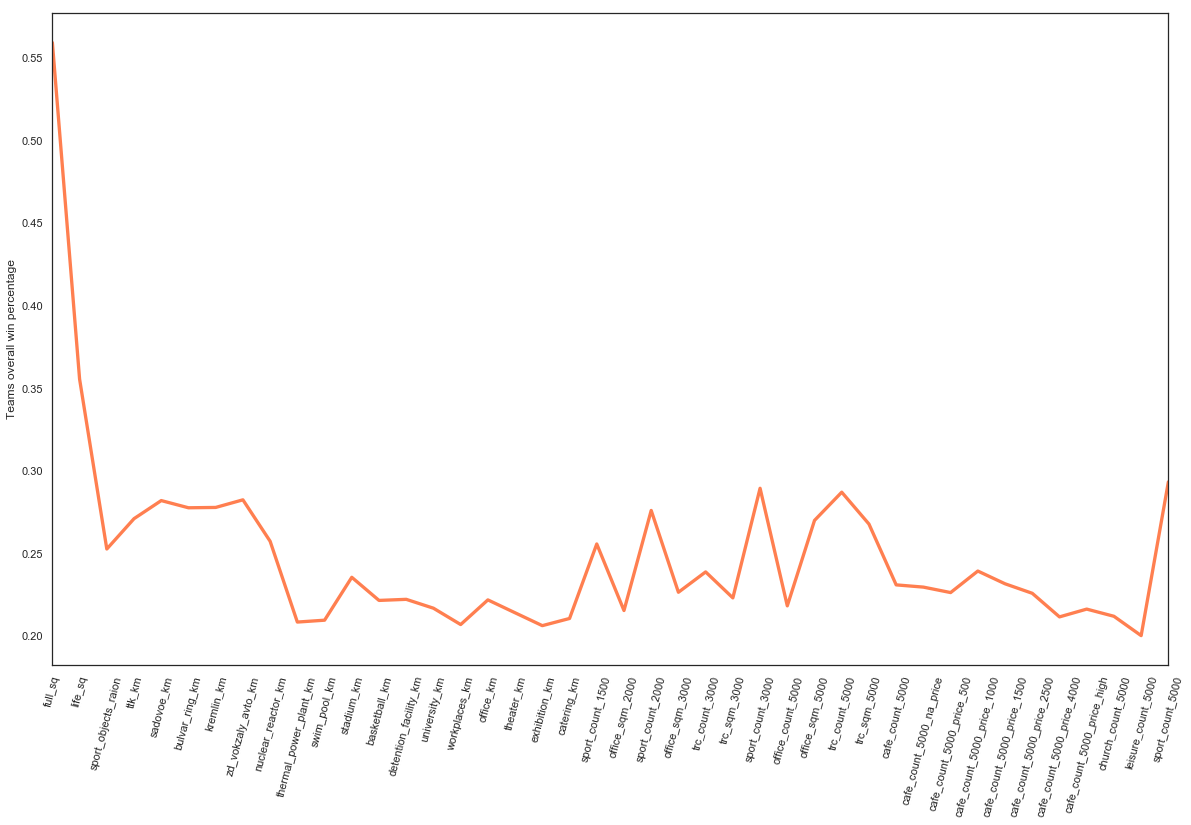

,attributes,correlation
0,full_sq,0.559
1,life_sq,0.356
2,sport_objects_raion,0.253
3,ttk_km,0.271
4,sadovoe_km,0.282
5,bulvar_ring_km,0.278
6,kremlin_km,0.278
7,zd_vokzaly_avto_km,0.282
8,nuclear_reactor_km,0.257
9,thermal_power_plant_km,0.209


In [338]:
# create a dataframe suing cols and correlations

df5 = pd.DataFrame({'attributes': corr_matrix[:-1].index, 'correlation': corr_matrix[:-1].values})

# lets plot above dataframe using the function we created

plot_dataframe(df5, 'Price')
df5

As we can see, from the highly correlated features from above, there are only 3 variables htat are above .1 which are `full_sq`, `life_sq` and `area_m`

In [232]:
df['imprtant_km'] = df[['swim_pool_km', 'stadium_km','zd_vokzaly_avto_km',
                                'basketball_km', 'detention_facility_km', 
                                'university_km', 'office_km', 'theater_km', 
                                'exhibition_km', 'catering_km', 'metro_km_avto', 'school_km']].mean(axis=1)
df['imprtant_count'] = df[['sport_count_1500', 'office_sqm_2000',
                                'shopping_centers_raion','office_sqm_3000', 'trc_count_3000', 
                                'sport_count_3000', 'office_count_5000', 'office_sqm_5000', 
                                'trc_count_5000', 'cafe_count_5000', 
                                        'church_count_5000','leisure_count_5000','sport_count_5000']].mean(axis=1)

df['imprtant_raison'] = df[['culture_objects_top_25_raion', 'additional_education_raion',
                                'sport_objects_raion', 'university_top_20_raion', 
                                'healthcare_centers_raion', 'school_top20_raison', 'school_education_centers_raion']].mean(axis=1)


df.num_room = by_area_sq.num_room.transform(median_impute)
df.num_room = by_area.num_room.transform(median_impute)
df.num_room = by_sq.num_room.transform(median_impute)

df.state = by_area_sq.state.transform(median_impute)
df.state = by_area.state.transform(median_impute)
df.state = by_sq.state.transform(median_impute)

### comparision stats
df['raion_pop_perc'] = df.raion_popul / df.area_m
df['male_female_rate'] = df.male_f / df.female_f
df['workers_perc'] = df.work_all / df.full_all



In [233]:
df.ecology.unique()

array(['good', 'excellent', 'poor', 'satisfactory', 'no data'],
      dtype=object)

In [43]:
ecol_dic = {'excellent' : 4, 
            'satisfactory' : 3,
            'good' : 2, 
            'poor' : 1, 
            'no data' : 0}

df['ecology']= df.ecology.map(ecol_dic)

In [261]:
potentialFeatures = ['id','full_sq', 'life_sq','sub_area','area_m', 'raion_popul',
                     'big_market_raion_yes', 'culture_objects_top_25_yes','product_type_Investment',
                     'ecology', 'zd_vokzaly_avto_km',
                     'sport_objects_raion', 'imprtant_km', 'imprtant_count', 'university_km', 'theater_km', 'workplaces_km',
                    'bulvar_ring_km', 'kremlin_km',
                    'product_type', 'price_doc', 'state',
                    'raion_pop_perc', 'male_female_rate', 'workers_perc', 'num_room',
                    'cafe_count_5000_price_1500', 'cafe_count_2000']

# 'female_f','work_all','ekder_all','big_road2_km', 'green_zone_part','male_f''full_all'

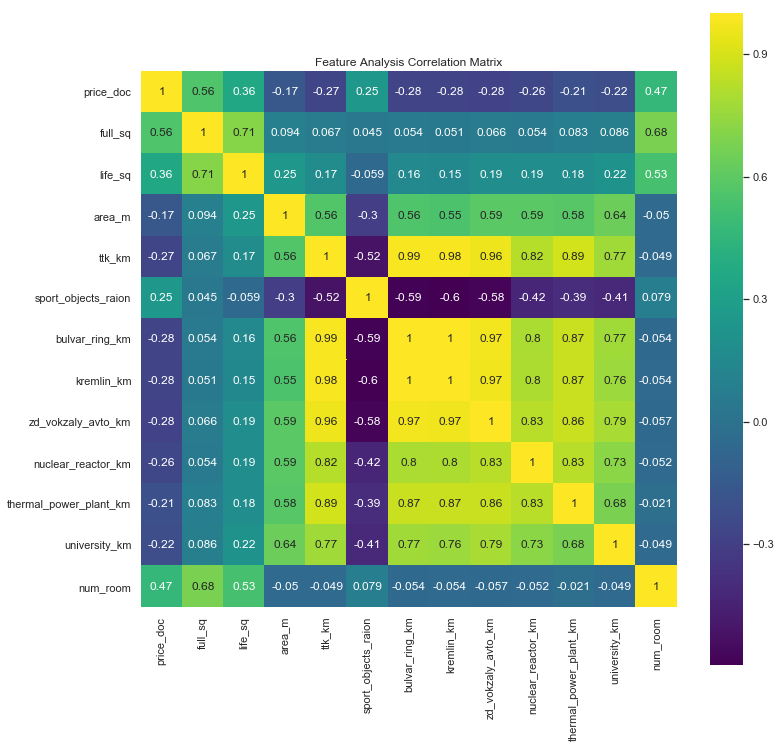

In [414]:
cols_ = ['price_doc', 'full_sq', 'life_sq','area_m', 'ttk_km', 'sport_objects_raion',
        'bulvar_ring_km', 'kremlin_km',  'zd_vokzaly_avto_km', 'nuclear_reactor_km',
         'thermal_power_plant_km', 'university_km', 'num_room']
corr_matrix = df[cols_].corr()

plt.figure(figsize=(12,12))
ax= plt.axes()
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='viridis', ax=ax)
ax.set_title('Feature Analysis Correlation Matrix')
plt.show()

#### Multicolineary 
$VIF_k=\frac{1}{1-R_{k}^{2}}$

In [419]:
#https://etav.github.io/python/vif_factor_python.html
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corr_matrix.values, i) for i in range(corr_matrix.shape[1])]
vif["features"] = corr_matrix.columns
print("Variance Inflation Factor for Heatmap Predictors")
vif.round(1)

Variance Inflation Factor for Heatmap Predictors


,VIF Factor,features
0,11.200,price_doc
1,38.300,full_sq
2,43.300,life_sq
3,420.500,area_m
4,129384.600,ttk_km
5,241.500,sport_objects_raion
6,10584380.600,bulvar_ring_km
7,7602644.600,kremlin_km
8,77710.100,zd_vokzaly_avto_km
9,14122.100,nuclear_reactor_km


## SAVE CHECKPOINT DATA FILE

In [82]:
# remove columns with NA values
null_list = pd.DataFrame(df.isnull().sum())
col_to_remove_lazy_EDA = list(null_list[null_list[0].values > 0].index)
df.loc[:, ~df.columns.isin(col_to_remove_lazy_EDA[:-1])].to_csv("df_clean_v3.csv")
df.loc[:, ~df.columns.isin(col_to_remove_lazy_EDA[:-1])].head()
#list(df.loc[:, ~df.columns.isin(col_to_remove_lazy_EDA)].columns)

,id,timestamp,full_sq,life_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,prek_raison,children_school,school_education_centers_raion,school_top20_raison,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,under6_all,under6_m,under6_f,seven_14_all,seven_14_m,seven_14_f,under17_all,under17m,under17f,sixteen_29_all,sixteen_29m,six_29f,under13_all,under13_m,under13_f,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_minwalk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,...,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_count_2000,sport_count_2000,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,flag,price_doc,full_sq10
0,1,40775,43,27.000,Investment,Bibirevo,6407578.100,155572,0.190,0.000,9576,5,10309,5,0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,8083,18654,9709,8945,1,2.590,1.131,13.575,1.131,0.146,0.178,2.159,0.601,1.081,23.683,1.804,3.633,5.420,6.906,1,0.275,3.300,0.993,no,1.422,10.919,13.101,13.676,15.156,1.422,1,no,3.831,5,1.305,no,14.232,101,24.292,1,18.152,5.719,1.2

In [235]:
#, 'sub_area'
df = pd.concat([df, pd.get_dummies(df[['product_type', 'culture_objects_top_25',
                                            'shopping_centers_raion', 'big_market_raion', 'school_top20_raison']])], axis=1)
#all_data.head()
#all_data = pd.concat([df, pd.get_dummies(df[['product_type', 'culture_objects_top_25',
                                            'shopping_centers_raion', 'big_market_raion', 'school_top20_raison']])], axis=1)
#all_data.head()

NameError: name 'all_data' is not defined

### Scaling

We will utilize `sklearn preprossing()` to take perform several scalling transfrmations. This activity is so the model is able to objectively use the selected features __with relatively equal weigting__ and does not need to compensate or add bias in the coefficient to those features that  contain a wider variance. 

In [344]:
all_data_ = df[potentialFeatures]
df_train4 = all_data_[:train.shape[0]]




from sklearn import preprocessing

col_to_scale = list(df_train4.select_dtypes(include='float64').columns)

for col_var in col_to_scale:  
    df_train4[col_var] = preprocessing.scale(df_train4[col_var].astype('float64'))



df_train4['price_doc'] = train.price_doc
df_train4['price_doc_log'] = np.log(train.price_doc)
df_train4.head()


,id,full_sq,life_sq,sub_area,area_m,raion_popul,big_market_raion_yes,culture_objects_top_25_yes,product_type_Investment,ecology,zd_vokzaly_avto_km,sport_objects_raion,imprtant_km,imprtant_count,university_km,theater_km,workplaces_km,bulvar_ring_km,kremlin_km,product_type,price_doc,state,raion_pop_perc,male_female_rate,workers_perc,num_room,cafe_count_5000_price_1500,cafe_count_2000,price_doc_log
0,1,43,-0.472,Bibirevo,-0.544,155572,0,0,1,good,-0.290,7,-0.267,-0.248,-0.022,0.617,-0.620,-0.159,-0.106,Investment,5850000,0.647,2.028,0.374,0.197,0.152,40,36,15.582
1,2,34,-0.837,Nagatinskij Zaton,-0.390,115352,0,1,1,excellent,-0.774,6,-0.579,0.391,-0.743,-0.397,-0.660,-0.813,-0.870,Investment,6000000,-1.152,0.322,-0.908,0.022,-1.054,36,21,15.607
2,3,43,-0.381,Tekstil'shhiki,-0.622,101708,0,0,1,poor,-0.745,5,-0.728,-0.132,-0.893,-0.755,-0.492,-0.822,-0.827,Investment,5700000,0.048,1.593,-0.704,-0.216,0.152,25,24,15.556
3,4,89,0.577,Mitino,-0.245,178473,0,0,1,good,0.025,17,-0.064,-0.465,0.599,1.029,-0.673,0.387,0.407,Investment,13100000,-1.152,0.622,0.065,3.824,1.357,15,25,16.388
4,5,77,1.809,Basmannoe,-0.448,108171,0,0,1,excellent,-1.515,25,-1.020,2.961,-0.871,-1.199,-0.618,-1.679,-1.595,Investment,16331452,1.247,0.440,1.036,1.213,1.357,552,483,16.609


In [345]:
df_train4.to_csv("df_train4.csv")

In [346]:
len(df_train4)

25471

In [347]:
print(list(df_train4.columns))

['id', 'full_sq', 'life_sq', 'sub_area', 'area_m', 'raion_popul', 'big_market_raion_yes', 'culture_objects_top_25_yes', 'product_type_Investment', 'ecology', 'zd_vokzaly_avto_km', 'sport_objects_raion', 'imprtant_km', 'imprtant_count', 'university_km', 'theater_km', 'workplaces_km', 'bulvar_ring_km', 'kremlin_km', 'product_type', 'price_doc', 'state', 'raion_pop_perc', 'male_female_rate', 'workers_perc', 'num_room', 'cafe_count_5000_price_1500', 'cafe_count_2000', 'price_doc_log']


In [348]:
df_test4 = all_data_[train.shape[0]:]
col_to_scale = list(df_test4.select_dtypes(include='float64').columns)
for col_var in col_to_scale:  
    df_test4[col_var] = preprocessing.scale(df_test4[col_var].astype('float64'))

df_test4['price_doc'] = 0
df_test4['price_doc_log'] = 0
df_test4.head()

,id,full_sq,life_sq,sub_area,area_m,raion_popul,big_market_raion_yes,culture_objects_top_25_yes,product_type_Investment,ecology,zd_vokzaly_avto_km,sport_objects_raion,imprtant_km,imprtant_count,university_km,theater_km,workplaces_km,bulvar_ring_km,kremlin_km,product_type,price_doc,state,raion_pop_perc,male_female_rate,workers_perc,num_room,cafe_count_5000_price_1500,cafe_count_2000,price_doc_log
25471,26,45,-0.411,Fili Davydkovo,-0.520,111374,0,0,1,satisfactory,-0.742,6,-0.701,-0.094,-0.180,-0.743,-0.602,-0.677,-0.697,Investment,0,0.043,0.881,4.998,-0.114,0.116,36,18,0
25472,30,42,-0.507,Jaroslavskoe,-0.454,94236,0,0,1,good,-0.710,13,-0.538,-0.340,-0.858,-0.805,-0.758,-0.595,-0.531,Investment,0,0.043,0.231,-0.093,-0.127,0.116,29,31,0
25473,35,39,-0.890,Staroe Krjukovo,-0.646,28537,0,0,1,no data,2.224,1,1.568,-0.544,-0.521,-0.714,-0.258,2.480,2.518,Investment,0,0.642,-0.440,0.074,-0.293,-1.078,3,9,0
25474,39,33,-0.938,Veshnjaki,-0.348,118945,0,0,1,poor,-0.436,7,-0.602,-0.414,-0.738,-1.145,-0.218,-0.479,-0.439,Investment,0,0.043,0.232,0.540,-0.134,-1.078,25,19,0
25475,48,36,-0.938,Novo-Peredelkino,-0.442,111023,0,0,1,good,0.565,6,0.155,-0.520,0.249,0.175,0.613,0.363,0.346,Investment,0,1.241,0.458,1.050,-0.213,-1.078,4,12,0


In [349]:
df_test4.to_csv("df_test4.csv")

In [350]:
print(list(df_test4.columns))

['id', 'full_sq', 'life_sq', 'sub_area', 'area_m', 'raion_popul', 'big_market_raion_yes', 'culture_objects_top_25_yes', 'product_type_Investment', 'ecology', 'zd_vokzaly_avto_km', 'sport_objects_raion', 'imprtant_km', 'imprtant_count', 'university_km', 'theater_km', 'workplaces_km', 'bulvar_ring_km', 'kremlin_km', 'product_type', 'price_doc', 'state', 'raion_pop_perc', 'male_female_rate', 'workers_perc', 'num_room', 'cafe_count_5000_price_1500', 'cafe_count_2000', 'price_doc_log']


In [351]:
len(df_test4)

5000

## RMSLE from SAS

In [307]:
submission = pd.read_csv("./data/sample_submission.csv")
lasso_result = pd.read_csv("./data/lasso_result.csv")

In [282]:
lasso_result = lasso_result[lasso_result.id.isin(test.id)]
lasso_result.head()

,id,price_doc
25471,26,nan
25472,30,nan
25473,35,nan
25474,39,nan
25475,48,nan


In [277]:
submission.head()

,id,price_doc
0,26,7118500.410
1,30,7118500.410
2,35,7118500.410
3,39,7118500.410
4,48,7118500.410


In [308]:
lasso_result = pd.read_csv("./data/lasso_result (3).csv")
lasso_result.head()

,VAR1,id,full_sq,life_sq,sub_area,area_m,raion_popul,big_market_raion_yes,culture_objects_top_25_yes,product_type_Investment,ecology,zd_vokzaly_avto_km,sport_objects_raion,imprtant_km,imprtant_count,university_km,theater_km,workplaces_km,bulvar_ring_km,kremlin_km,product_type,price_doc,state,raion_pop_perc,male_female_rate,workers_perc,num_room,cafe_count_5000_price_1500,cafe_count_2000,price_doc_log,ecology_2,ecology_3,sub_area_Ham,_ROLE_,predict,r
0,0,1,43,-0.472,Bibirevo,-0.544,155572,0,0,1,good,-0.290,7,-0.267,-0.248,-0.022,0.617,-0.620,-0.159,-0.106,Investment,5850000.000,0.647,2.028,0.374,0.197,0.152,40,36,15.582,0,0,0,TRAIN,5912602.359,-62602.359
1,1,2,34,-0.837,Nagatinskij Zaton,-0.390,115352,0,1,1,excellent,-0.774,6,-0.579,0.391,-0.743,-0.397,-0.660,-0.813,-0.870,Investment,6000000.000,-1.152,0.322,-0.908,0.022,-1.054,36,21,15.607,0,0,0,TRAIN,5569461.061,430538.939
2,2,3,43,-0.381,Tekstil'shhiki,-0.622,101708,0,0,1,poor,-0.745,5,-0.728,-0.132,-0.893,-0.755,-0.492,-0.822,-0.827,Investment,5700000.000,0.048,1.593,-0.704,-0.216,0.152,25,24,15.556,0,0,0,VALIDATE,5966155.955,-266155.955
3,3,4,89,0.577,Mitino,-0.245,178473,0,0,1,good,0.025,17,-0.064,-0.465,0.599,1.029,-0.673,0.387,0.407,Investment,13100000.000,-1.152,0.622,0.065,3.824,1.357,15,25,16.388,0,0,0,TRAIN,11795081.363,1304918.637
4,4,5,77,1.809,Basmannoe,-0.448,108171,0,0,1,excellent,-1.515,25,-1.020,2.961,-0.871,-1.199,-0.618,-1.679,-1.595,Investment,16331452.000,1.247,0.440,1.036,1.213,1.357,552,483,16.609,0,0,0,TRAIN,13661869.992,2669582.008


In [309]:
l_result = lasso_result[lasso_result._ROLE_ == 'VALIDATE'][['price_doc', 'predict']]
l_result.head()

,price_doc,predict
2,5700000.000,5966155.955
5,9100000.000,9842247.044
8,5300000.000,6859833.024
9,2000000.000,6326091.578
13,5200000.000,5094977.521


In [311]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score

print("RMSLE: ", np.sqrt(mean_squared_log_error(abs(l_result.predict),l_result.price_doc)))

RMSLE:  0.5122194573284836


In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score


print("RMSLE: %.3f" % np.sqrt(mean_squared_error(y_test, predictions)))
print ("R^2: %.3f" % r2_score(y_test, predictions))
print("Result: %.3f" % model_lr.score(X_train, y_train))
print("RMSLE: ", np.sqrt(mean_squared_log_error(predictions,y_test)))
print("RMSLE: ", np.sqrt(mean_squared_log_error(predictions,y_test)))

In [199]:
all_data_ = all_data[potentialFeatures]
df_train4 = all_data_[:train.shape[0]]
df_train4['price_doc'] = train.price_doc
df_train4['price_doc_log'] = np.log(train.price_doc)
df_train4.head()

,full_sq,life_sq,area_m,raion_popul,big_market_raion_yes,big_market_raion_yes,culture_objects_top_25_yes,culture_objects_top_25_yes,product_type_Investment,product_type_Investment,metro_km_avto,zd_vokzaly_avto_km,sport_objects_raion,imprtant_km,imprtant_count,detention_facility_km,university_km,theater_km,workplaces_km,bulvar_ring_km,kremlin_km,full_all,product_type,price_doc,state,raion_pop_perc,male_female_rate,workers_perc,num_room,children_school,price_doc_log
0,43,27.000,6407578.100,155572,0,0,0,0,1,1,1.131,14.232,7,5.289,96012.846,4.248,6.715,14.053,0.884,13.676,15.156,86206,Investment,5850000,2.500,0.024,0.885,1.139,2.000,10309,15.582
1,34,19.000,9589336.912,115352,0,0,1,1,1,1,0.647,9.243,6,3.672,282953.385,12.650,1.853,6.830,0.686,8.133,8.698,76284,Investment,6000000,1.000,0.012,0.813,0.920,1.000,7759,15.607
2,43,29.000,4808269.831,101708,0,0,0,0,1,1,1.638,9.541,5,2.899,129965.154,7.682,0.841,4.273,1.510,8.054,9.068,101982,Investment,5700000,2.000,0.021,0.824,0.622,2.000,6207,15.556
3,89,50.000,12583535.690,178473,0,0,0,0,1,1,0.985,17.478,17,6.339,32487.462,8.790,10.903,16.991,0.622,18.309,19.487,21155,Investment,13100000,1.000,0.014,0.868,5.690,3.000,13670,16.388
4,77,77.000,8398460.622,108171,0,0,0,0,1,1,0.877,1.596,25,1.387,1034956.154,3.780,0.992,1.112,0.893,0.788,2.579,28179,Investment,16331452,3.000,0.013,0.923,2.415,3.000,6748,16.609


In [312]:
print(list(df_train4.columns))

['id', 'full_sq', 'life_sq', 'sub_area', 'area_m', 'raion_popul', 'big_market_raion_yes', 'culture_objects_top_25_yes', 'product_type_Investment', 'ecology', 'zd_vokzaly_avto_km', 'sport_objects_raion', 'imprtant_km', 'imprtant_count', 'university_km', 'theater_km', 'workplaces_km', 'bulvar_ring_km', 'kremlin_km', 'product_type', 'price_doc', 'state', 'raion_pop_perc', 'male_female_rate', 'workers_perc', 'num_room', 'cafe_count_5000_price_1500', 'cafe_count_2000', 'price_doc_log']


In [201]:
df_train4.to_csv("df_train4.csv")

# Modeling

next we create our final dataset where we exclude any categorical variable (since we have alread performe one-hot encoding to create the dummy variables).

In [359]:
#all_data_ = pd.concat((df_train4, df_test4), axis = 0, ignore_index=True)
df_train = df_train4

In [360]:
ecol_dic = {'excellent' : 4, 
            'satisfactory' : 3,
            'good' : 2, 
            'poor' : 1, 
            'no data' : 0}

df_train['ecology']= df_train.ecology.map(ecol_dic)

In [361]:
df_train.dtypes

id                              int64
full_sq                         int64
life_sq                       float64
sub_area                       object
area_m                        float64
raion_popul                     int64
big_market_raion_yes            uint8
culture_objects_top_25_yes      uint8
product_type_Investment         uint8
ecology                         int64
zd_vokzaly_avto_km            float64
sport_objects_raion             int64
imprtant_km                   float64
imprtant_count                float64
university_km                 float64
theater_km                    float64
workplaces_km                 float64
bulvar_ring_km                float64
kremlin_km                    float64
product_type                   object
price_doc                       int64
state                         float64
raion_pop_perc                float64
male_female_rate              float64
workers_perc                  float64
num_room                      float64
cafe_count_5

set selected columns as categorical for label encoding

In [362]:
# https://stackoverflow.com/questions/36808434/label-encoder-encoding-missing-values
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(df_train.sub_area)
# Apply the fitted encoder to the pandas column
df_train['sub_area'] = le.transform(df_train.sub_area) 
#le.classes_

In [363]:
df_train.head()

,id,full_sq,life_sq,sub_area,area_m,raion_popul,big_market_raion_yes,culture_objects_top_25_yes,product_type_Investment,ecology,zd_vokzaly_avto_km,sport_objects_raion,imprtant_km,imprtant_count,university_km,theater_km,workplaces_km,bulvar_ring_km,kremlin_km,product_type,price_doc,state,raion_pop_perc,male_female_rate,workers_perc,num_room,cafe_count_5000_price_1500,cafe_count_2000,price_doc_log
0,1,43,-0.472,9,-0.544,155572,0,0,1,2,-0.290,7,-0.267,-0.248,-0.022,0.617,-0.620,-0.159,-0.106,Investment,5850000,0.647,2.028,0.374,0.197,0.152,40,36,15.582
1,2,34,-0.837,70,-0.390,115352,0,1,1,4,-0.774,6,-0.579,0.391,-0.743,-0.397,-0.660,-0.813,-0.870,Investment,6000000,-1.152,0.322,-0.908,0.022,-1.054,36,21,15.607
2,3,43,-0.381,129,-0.622,101708,0,0,1,1,-0.745,5,-0.728,-0.132,-0.893,-0.755,-0.492,-0.822,-0.827,Investment,5700000,0.048,1.593,-0.704,-0.216,0.152,25,24,15.556
3,4,89,0.577,65,-0.245,178473,0,0,1,2,0.025,17,-0.064,-0.465,0.599,1.029,-0.673,0.387,0.407,Investment,13100000,-1.152,0.622,0.065,3.824,1.357,15,25,16.388
4,5,77,1.809,6,-0.448,108171,0,0,1,4,-1.515,25,-1.020,2.961,-0.871,-1.199,-0.618,-1.679,-1.595,Investment,16331452,1.247,0.440,1.036,1.213,1.357,552,483,16.609


In [384]:
y = np.log(df_train.price_doc)
X = df_train.drop(['id', 'price_doc','price_doc_log', 'product_type', 'life_sq','area_m',
                  'big_market_raion_yes', 'culture_objects_top_25_yes', 'sport_objects_raion',
                  'imprtant_km', 'imprtant_count', 'university_km', 'theater_km','bulvar_ring_km',
                   'product_type_Investment', 'workers_perc', 'raion_pop_perc',
                  'kremlin_km', 'workplaces_km', 'cafe_count_5000_price_1500', 'cafe_count_2000'], axis=1)

### Partition data into test/train for modeling
Next we will set the feature variable `X` and the target variable `y`. The target variable will be the log of price_doc, as explained earlier in the EDA section. Additionally, utilize `pandas` `drop()` function to exclude columns that we created for data anaysis puposes and indicators such as `flag` and `full_sq10` and also variables that do not have any relevance in this current prediction objectives such as `id` and `timestamp`.

In [385]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

lasso model help: https://codeliteral.wordpress.com/2017/02/01/machine-learning-data-analysis-lasso-regression-with-sklearn/

In [386]:
from sklearn.linear_model import LassoCV, LassoLarsCV
# specify lass regerssion model
model = LassoLarsCV(cv=10, precompute=False).fit(X_train, y_train)

# prinv vars names and coeff
dict(zip(X.columns, model.coef_))

{'full_sq': 0.009561281150971542,
 'sub_area': -0.000326602892230891,
 'raion_popul': 3.892896213086331e-07,
 'ecology': 0.006387656438114541,
 'zd_vokzaly_avto_km': -0.13993402923690648,
 'state': 0.014441346914495204,
 'male_female_rate': -0.004135548584556708,
 'num_room': 0.09332036416756774}

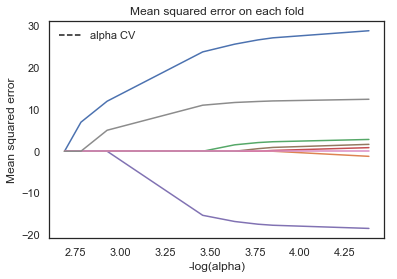

In [387]:
#plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

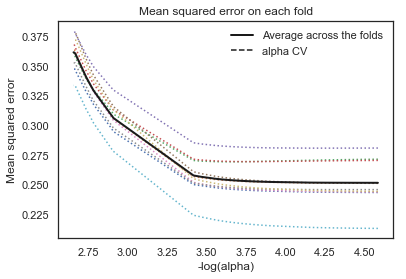

In [388]:
#plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k', label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')
plt.show()

In [391]:
# MSE, R^2 and Variance
print("RMSLE (train): %.3f" % np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
print("mse train: %.3f" % mean_squared_error(y_train, model.predict(X_train)))
print("RMSLE (test): %.3f" % np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print ("R^2 (test): %.3f" % r2_score(y_test, model.predict(X_test)))
print ("R^2 (train): %.3f" % r2_score(y_train, model.predict(X_train)))

RMSLE (train): 0.501
mse train: 0.251
RMSLE (test): 0.517
R^2 (test): 0.274
R^2 (train): 0.307


In [410]:
print("Best alpha using built-in LassoCV: %f" % model.alpha_)
print("Best score using built-in LassoCV: %f" %model.score(X,y))
coef = pd.Series(model.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000000
Best score using built-in LassoCV: 0.296620


In [411]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

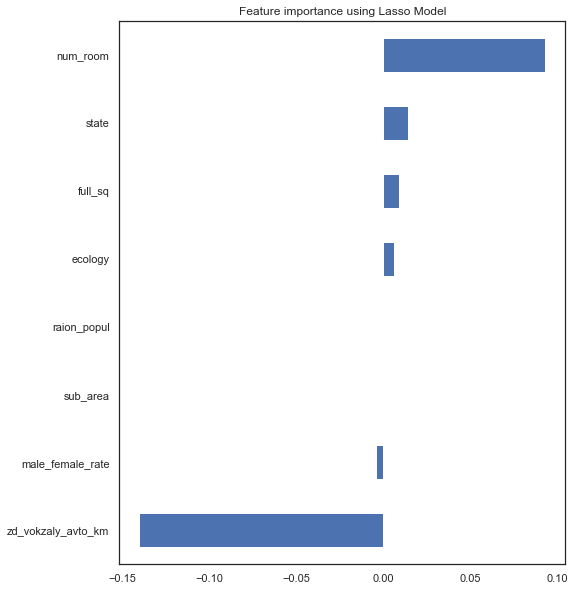

In [412]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

__SAVE CHECKPOINT FOR SAS__

### Linear Regression

We will perform basic lienar regression and Next we will caclulate the _RMSE_ which measures the distance between our predicted vs actual values,

In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, confusion_matrix, accuracy_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# predictions
predictions = model_lr.predict(X_test)

# MSE, R^2 and Variance
print("RMSLE: %.3f" % np.sqrt(mean_squared_error(y_test, predictions)))
print ("R^2: %.3f" % r2_score(y_test, predictions))
print("Result: %.3f" % model_lr.score(X_train, y_train))
print("RMSLE: ", np.sqrt(mean_squared_log_error(predictions,y_test)))

#cm = confusion_matrix(y_test,model_lr.predict(X_test))
#sns.heatmap(cm,annot=True,fmt="d")

RMSLE: 0.510
R^2: 0.290
Result: 0.325
RMSLE:  0.0314745939178158


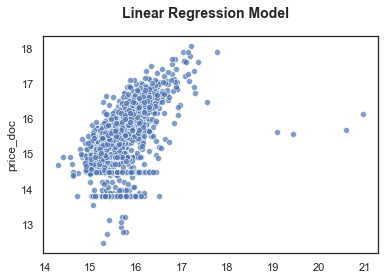

In [301]:
plt.suptitle('Linear Regression Model', fontsize=14, fontweight='bold')
sns.scatterplot(predictions, y_test, alpha=.7, )